In [4]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [5]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/ca-GrQc.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/ca-GrQc.gpickle


In [6]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1076
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4166
influencer {8064, 9994, 25866, 9486, 11791, 12688, 10897, 12306, 18579, 12695, 7959, 4634, 16800, 3873, 14496, 9127, 20779, 6703, 18608, 21167, 17589, 13493, 3511, 8376, 15802, 16314, 12612, 17990, 13384, 21194, 20046, 16335, 3922, 20052, 598, 21593, 15961, 8036, 23910, 19687, 3948, 492, 19440, 18034, 13682, 5621, 1782, 23419, 19325, 5631}


In [7]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 10))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (10, {'Random': {7515, 2596, 21469, 15415}, 'Degree': set()}), (20, {'Random': {22497, 24001, 10180, 10477, 23151}, 'Degree': {21012}}), (30, {'Random': {20774, 11642, 8369, 15891, 3286, 25271, 24762, 20383}, 'Degree': {21281, 21012}}), (40, {'Random': {18757, 19783, 13832, 22378, 7280, 8177, 22224, 11926, 17751, 25849, 17818, 25596, 4798, 9151}, 'Degree': {21281, 22691, 21012}}), (50, {'Random': {10912, 2307, 1347, 2248, 8457, 23114, 21579, 7482, 14540, 24270, 10000, 8786, 25528, 11641, 3034, 13501, 19551}, 'Degree': {21281, 22691, 21012}}), (60, {'Random': {19712, 3074, 10246, 13067, 3989, 23452, 20129, 25910, 16953, 4673, 23506, 18899, 3292, 10588, 24029, 19554, 11108, 7014, 18279, 880}, 'Degree': {21281, 22691, 21012, 12365}}), (70, {'Random': {15252, 11293, 6943, 4000, 2848, 7716, 4275, 23989, 5181, 18238, 18366, 17343, 3524, 15685, 20805, 22980, 8403, 24148, 15195, 3681, 97, 19687, 22890, 21101, 13683, 1656, 1149, 894}, 'Degree': {21281, 

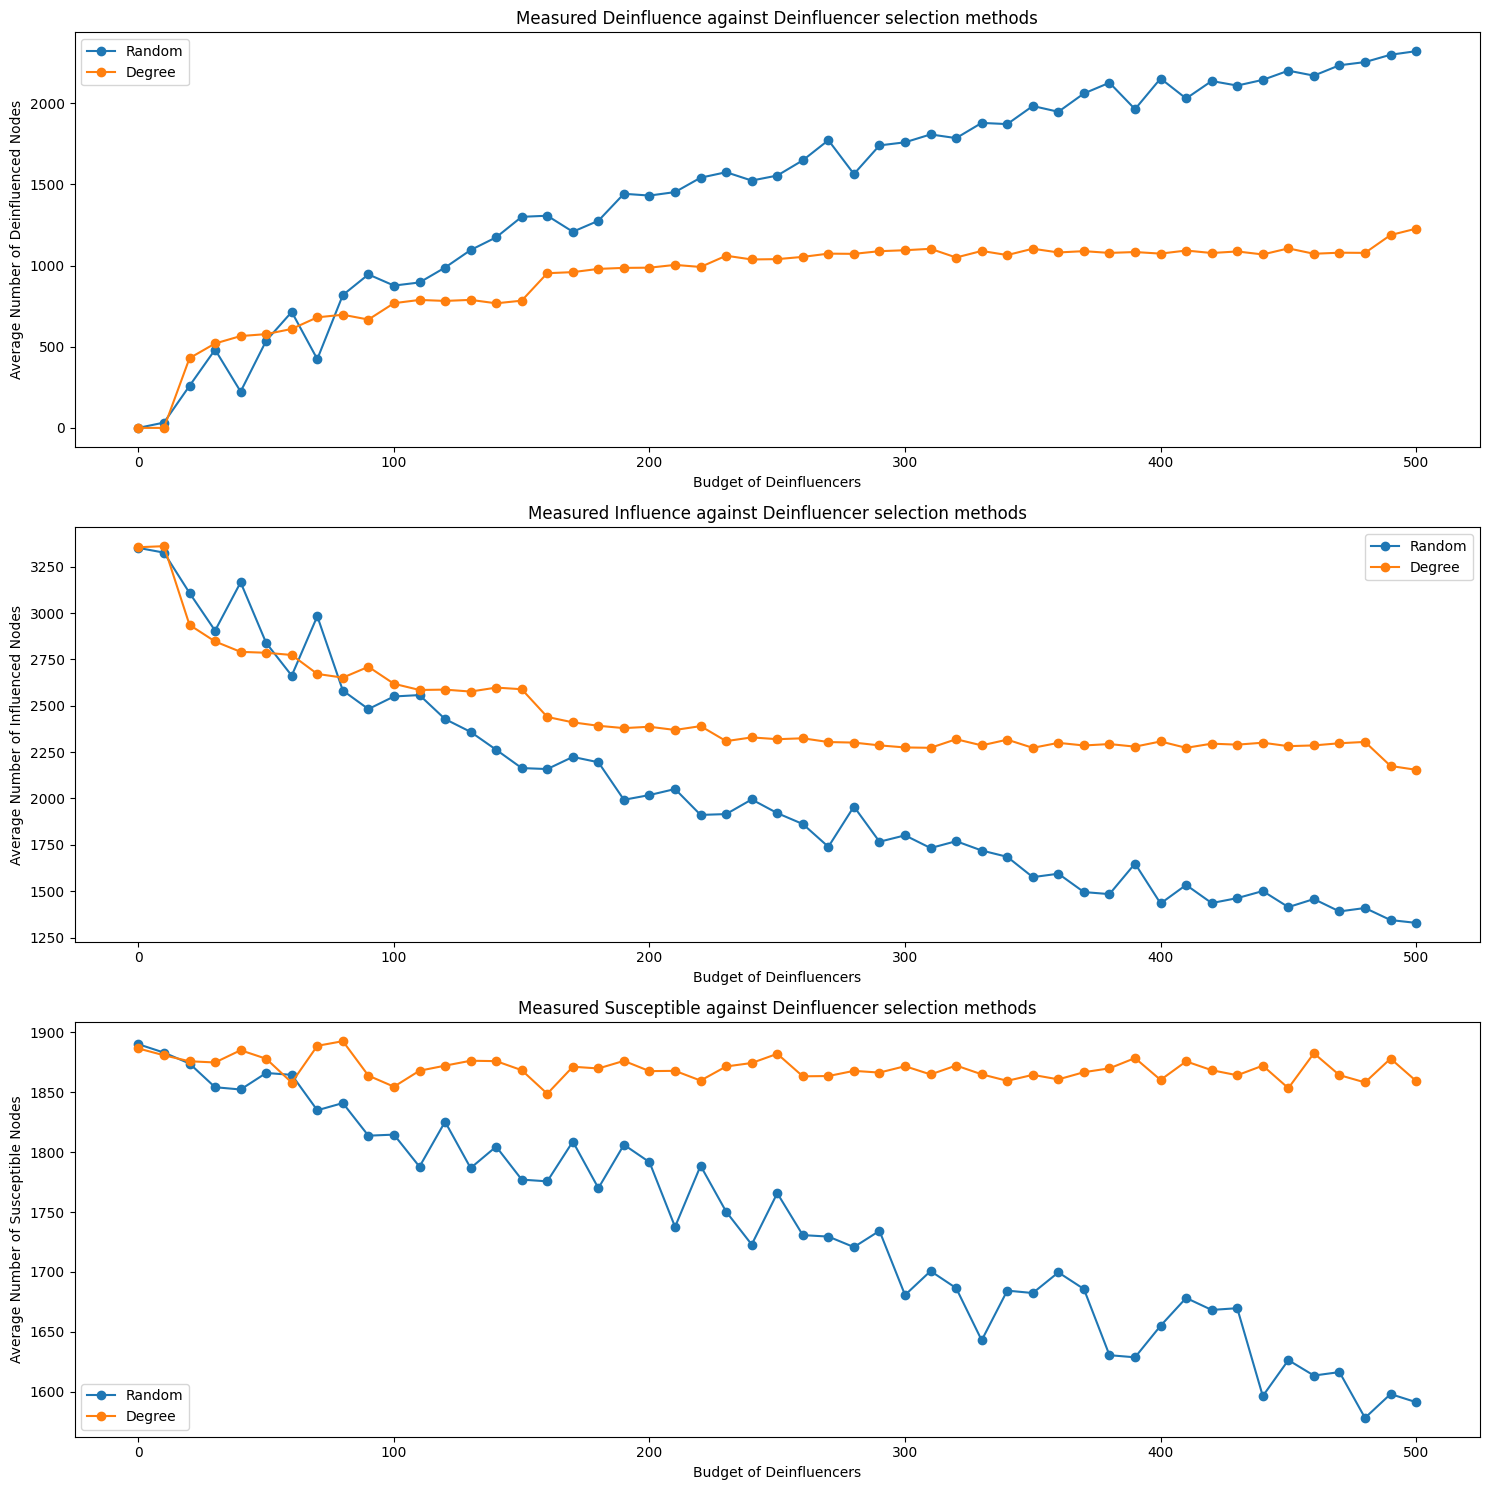

In [8]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [9]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 10))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (10, {'Random': {18995, 16931}, 'Degree': set()}), (20, {'Random': {8801, 10183, 13615, 12017, 628, 8155}, 'Degree': {21012}}), (30, {'Random': {16483, 10243, 19596, 17294, 26194, 914, 17848, 19387, 10588, 4383}, 'Degree': {21281, 21012}}), (40, {'Random': {13056, 21313, 11213, 9037, 4989, 16210, 11572, 1048, 16730, 8669, 894}, 'Degree': {21281, 22691, 21012}}), (50, {'Random': {8448, 18337, 24002, 9959, 12553, 24203, 4624, 19313, 13556, 15960, 11642, 14747, 3292, 15678, 6815}, 'Degree': {21281, 22691, 21012}}), (60, {'Random': {20065, 24294, 20231, 10983, 1958, 15786, 13485, 11054, 21596, 12689, 21809, 1013, 13621, 3096, 7801, 6172, 20478, 1310}, 'Degree': {21281, 22691, 21012, 12365}}), (70, {'Random': {12803, 25220, 23558, 16393, 11034, 20636, 7069, 19997, 1059, 16675, 26023, 9514, 22827, 15418, 4027, 21823, 3136, 4033, 4037, 25287, 200, 15181, 20942, 14159, 22369, 11114, 18156, 22000, 3953, 25595}, 'Degree': {21281, 22691, 12365, 6610, 2101

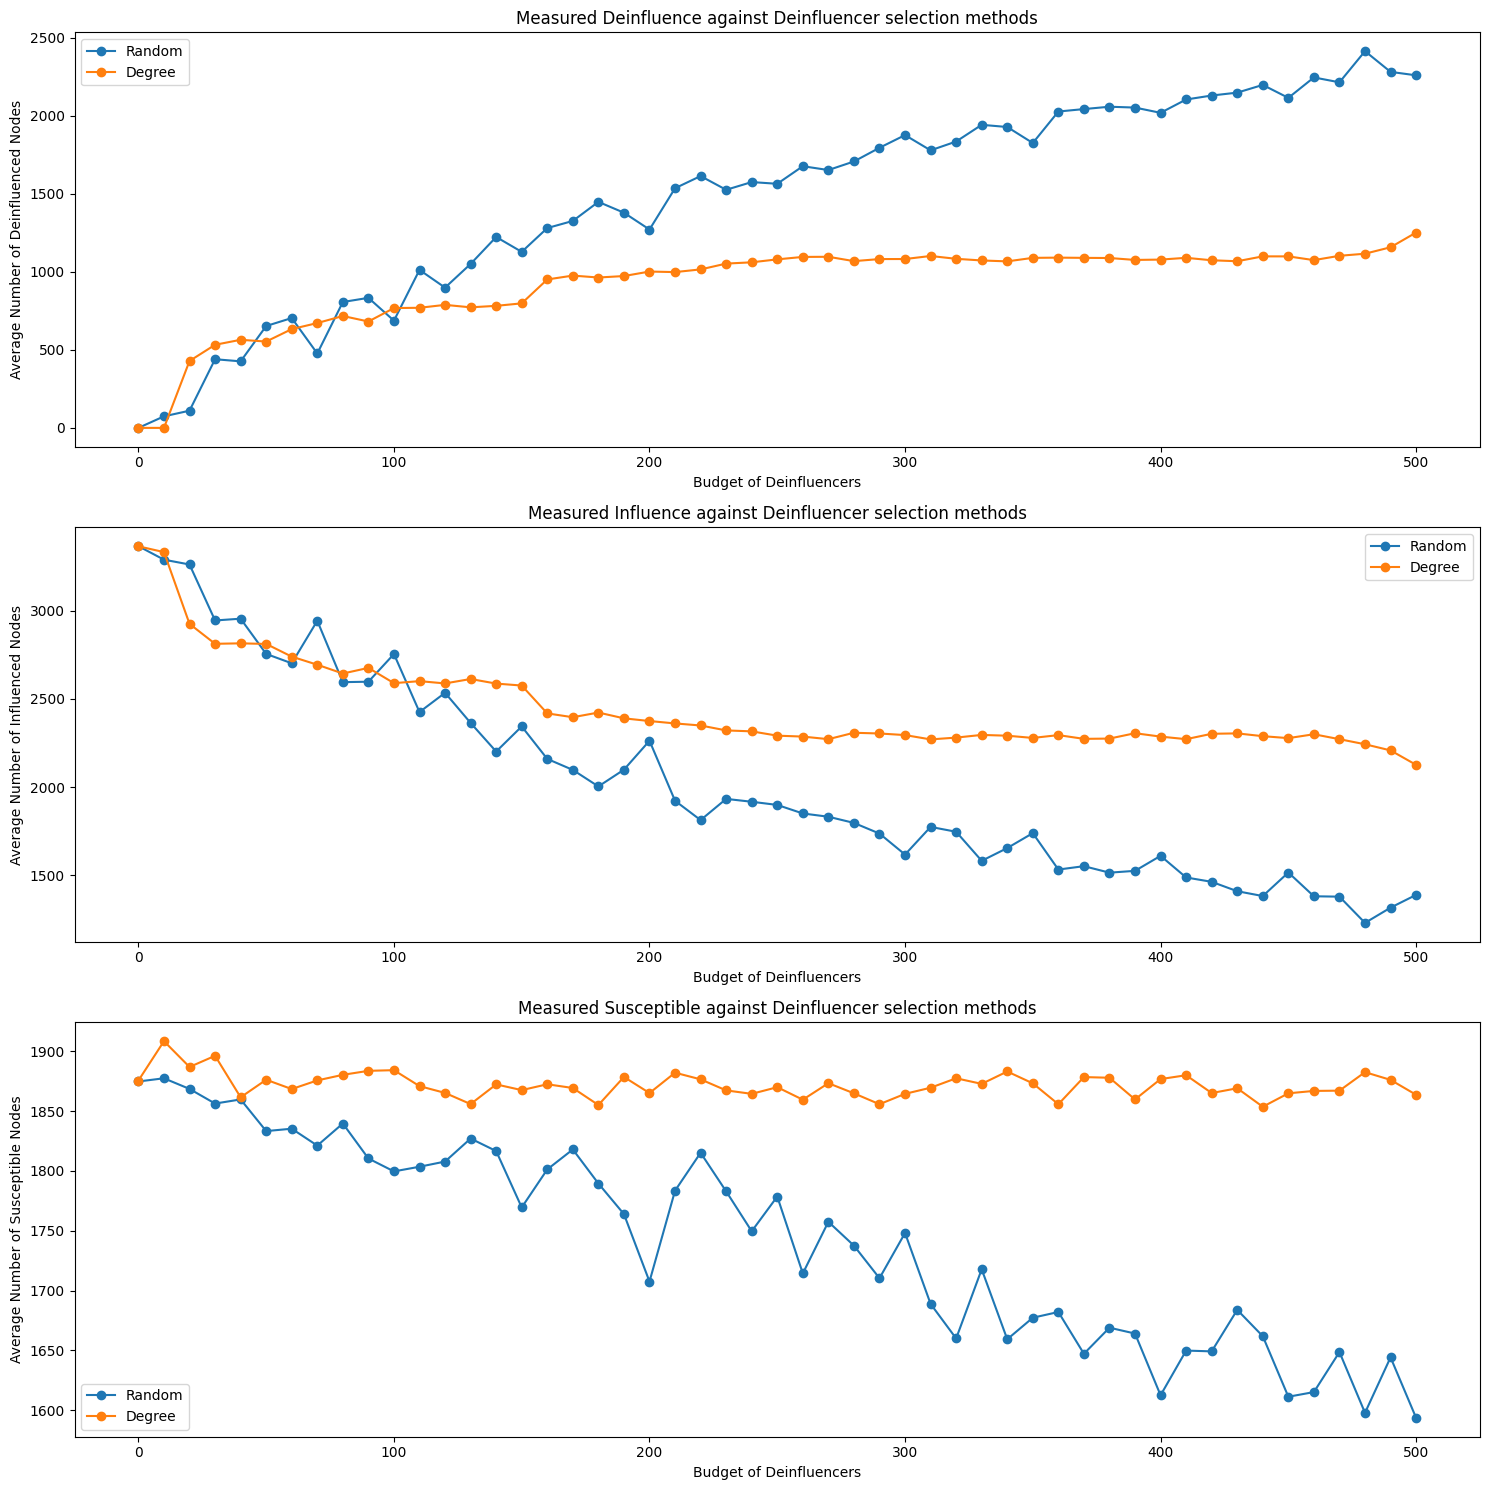

In [10]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()